In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
from math import ceil
import scipy.stats


# Task 7

## Task 7.1 –ú–µ—Ç–æ–¥ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞
–ú–µ—Ç–æ–¥–æ–º —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –Ω–∞–π—Ç–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ $f$ –Ω–∞ –º–Ω–æ–∂–µ—Å—Ç–≤–µ $A = \{x_1, x_2: x_1^2+x_2^2 \leq 1\}$, –≥–¥–µ  
$$f(x) = x_1^3 \sin \dfrac{1}{x_1} + 10 x_1 x_2^4 \cos \dfrac{1}{x_2}$$
–ø—Ä–∏ $x_1 = 0$ –∏–ª–∏ $x_2 = 0$ —Ñ—É–Ω–∫—Ü–∏—è –¥–æ–æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø–æ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç–∏  
\
–ë—É–¥–µ–º $n$ —Ä–∞–∑ —Ä–∞–∑—ã–≥—Ä—ã–≤–∞—Ç—å –ø–∞—Ä—É —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω $x_1, x_2$ –∏ –≤—ã–±–∏—Ä–∞—Ç—å –Ω–∞–∏–º–µ–Ω—å—à–µ–µ $f(x_1, x_2)$. –î–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–µ–π–¥–µ–º —Å–Ω–∞—á–∞–ª–∞ –≤ –ø–æ–ª—è—Ä–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã: $x_1 = r \cos \phi, x_2 = r \sin \phi$:
$$1 = \iint\limits_{A}\dfrac{1}{\pi} dx_1 dx_2 = \dfrac{1}{\pi} \int_0^1 r dr \int _0^{2\pi} d \phi = \int_0^1 2r dr \int _0^{2\pi} \dfrac{1}{2\pi} d \phi$$
–¢–æ –µ—Å—Ç—å –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –º—ã –∏–º–µ–µ–º —Å.–≤. $\phi \sim U[0, 2\pi]$ –∏ $r$, –∏–º–µ—é—â—É—é –ø–ª–æ—Ç–Ω–æ—Å—Ç—å $p_r(x) = 2x [x \in [0, 1]] $ –∏ —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $F_r(x) = x^2 [x \in [0, 1]] + [x > 1]$.  
–î–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è r –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –º–µ—Ç–æ–¥–æ–º –æ–±—Ä–∞—â–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Ç.–µ. –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º $\xi \sim U[0, 1]$, –Ω–∞—Ö–æ–¥–∏–º $r = F_r^{-1}(\xi) = \sqrt \xi$

In [133]:
def f(x, y):
    res = np.zeros(x.shape)
    not_zero_mask = np.where(abs(x*y) > 1e-12)
    x_nz, y_nz = x[not_zero_mask], y[not_zero_mask]
    res[not_zero_mask] = x_nz**3 * np.sin(1/x_nz) + \
                        10*x_nz*(y_nz**4)*np.cos(1/y_nz)
    return res

In [130]:
n = int(1e6)

phi = 2*np.pi* np.random.rand(n)
r = np.sqrt(np.random.rand(n))


x = r * np.cos(phi)
y = r * np.sin(phi)
f_res = f(x, y)
idx_min = np.argmin(f_res)
x_min, y_min, f_min = x[idx_min], y[idx_min], f_res[idx_min]


print('x_min, y_min = ', x_min, y_min)
print('f_min = ', f_min)

x_min, y_min =  -0.3547833334893437 0.9349195625828262
f_min =  -1.2881610310413494


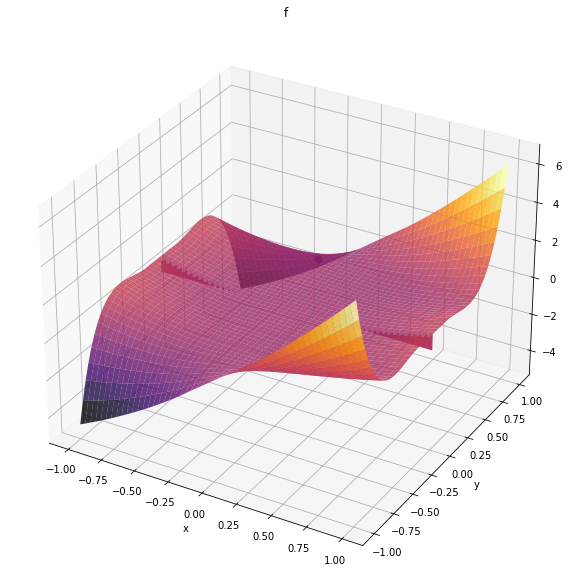

In [135]:
x, y = np.mgrid[-1:1:0.001, -1:1:0.001]
z = f(x, y)
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_min, y_min, f_min, c='black', s=50, alpha=1)
ax.plot_surface(x, y, z, cmap='inferno', alpha=.8)

plt.title('f')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### –¢–æ—á–Ω–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏–π
–ü—É—Å—Ç—å $(x_0, y_0)$ - —Ç–æ—á–∫–∞ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞ —Ñ—É–Ω–∫—Ü–∏–∏. –¢–æ–≥–¥–∞
$$|f(x_0, y_0) - f(x, y)| \leq \max_{(x, y) \in A}|\nabla f| |(x_0, y_0) - (x, y)| $$  
–û—Ü–µ–Ω–∏–º –º–∞–∫—Å–∏–º—É–º –≥—Ä–∞–¥–∏–µ–µ–Ω—Ç–∞ $|\nabla f| = \sqrt{ \biggl( \dfrac{\partial f}{\partial x_1} \biggr)^2 + \biggl( \dfrac{\partial f}{\partial x_2} \biggr)^2}$  
\
$$ \biggl| \dfrac{\partial f}{\partial x_1} \biggr| = \biggl| 3x_1^2 \sin \dfrac{1}{x_1} - x_1 \cos \dfrac{1}{x_1} + 10 x_2 \cos \dfrac{1}{x_2}\biggr| \leq 3x_1^2 + |x_1| + 10x_2^4 \leq 14$$
\
\
$$\biggl| \dfrac{\partial f}{\partial x_2} \biggr| = \biggl| 40 x_1 x_2^3 \cos \dfrac{1}{x_2} + 10 x_1 x_2^2 \sin \dfrac{1}{x_2} \biggr| \leq  40 |x_1| |x_2|^3 + 10 |x_1||x_2|^2 \leq 50$$
\
\
–û—Ü–µ–Ω–∏–º $|(x_0, y_0) - (x, y)|$, –≥–¥–µ $(x, y)$- –Ω–∞—à–∞ —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞.  
–ü—É—Å—Ç—å $p$ - –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å, —á—Ç–æ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∞ –∏–∑ $n$ —Å–ª—É—á–∞–π–Ω—ã—Ö —Ç–æ—á–µ–∫ –ø–æ–ø–∞–ª–∞ –≤ $\delta$-–æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç—å —Ç–æ—á–∫–∏ –º–∏–Ω–∏–º—É–º–∞.
* –ï—Å–ª–∏ —Ç–æ—á–∫–∞ –º–∏–Ω–∏–º—É–º–∞ –ª–µ–∂–∏—Ç –Ω–∞ –≥—Ä–∞–Ω–∏—Ü–µ $A$ (—Ç–æ–≥–¥–∞ –ø–æ–ø–∞–¥–∞–µ—Ç –ø–æ–ª–æ–≤–∏–Ω–∞ –æ–∫—Ä–µ—Å—Ç–Ω–æ—Å—Ç–∏), —Ç–æ $p = 1 - \biggl(1 - \dfrac{2 \dfrac{1}{2} \pi \delta^2}{\pi 1^2} \biggr)^n = 1 - (1-\delta^2)^n$
* –ï—Å–ª–∏ —Ç–æ—á–∫–∞ –º–∏–Ω–∏–º—É–º–∞ –ª–µ–∂–∏—Ç –≤–Ω—É—Ç—Ä–∏ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ $A$, —Ç–æ $p = 1 - \biggl(1 - \dfrac{2 \pi \delta^2}{\pi 1^2} \biggr)^n = 1 - (1-2\delta^2)^n$

–ó–Ω–∞—á–∏—Ç, –≤ —Ö—É–¥—à–µ–º —Å–ª—É—á–∞–µ $\delta = \sqrt{1-(1-p)^{\dfrac{1}{n}}} = \sqrt{1 - (1 - \dfrac{p}{n})} =\sqrt{\dfrac{p}{n}} $

–ü–æ–ª—É—á–∏–ª–∏
$$ |f(x_0, y_0) - f(x, y)| \leq 52 \sqrt{\frac{p}{n}} \leq \varepsilon$$
–û—Ç–∫—É–¥–∞ $$n \geq 52^2 \dfrac{p}{\varepsilon^2}$$
–ü—Ä–∏ $p=0.99, \ \varepsilon = 0.01, \ n \approx 2.6 \cdot 10^7$  
–ü—Ä–∏ —Ç–∞–∫–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏:

In [137]:
n = int(2.6 * 1e7)

phi = 2*np.pi* np.random.rand(n)
r = np.sqrt(np.random.rand(n))


x = r * np.cos(phi)
y = r * np.sin(phi)
f_res = f(x, y)
idx_min = np.argmin(f_res)
x_min, y_min, f_min = x[idx_min], y[idx_min], f_res[idx_min]


print('x_min, y_min = ', x_min, y_min)
print('f_min = ', f_min)

x_min, y_min =  -0.3583417911264346 0.9335896168432862
f_min =  -1.288469107432794


## Task 7.2  –ú–µ—Ç–æ–¥ –∏–º–∏—Ç–∞—Ü–∏–∏ –æ—Ç–∂–∏–≥–∞ (Simulated annealing)
–ú–µ—Ç–æ–¥–æ–º –∏–º–∏—Ç–∞—Ü–∏–∏ –æ—Ç–∂–∏–≥–∞ –Ω–∞–π—Ç–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –†–æ–∑–µ–Ω–±—Ä–æ–∫–∞ $g(x)$ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ $\mathbb{R}^2$  
[–ê–ª–≥–æ—Ä–∏—Ç–º –∏–º–∏—Ç–∞—Ü–∏–∏ –æ—Ç–∂–∏–≥–∞](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0)

**–û—Å–Ω–æ–≤–Ω—ã–µ —à–∞–≥–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞**:  
1. –°–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è –Ω–∞—á–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞ $x= x_0; x_0 \in S$ –∏ –Ω–∞—á–∞–ª—å–Ω–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ $T_0$. 
2. k-—è –∏—Ç–µ—Ä–∞—Ü–∏—è –æ—Å–Ω–æ–≤–Ω–æ–≥–æ —Ü–∏–∫–ª–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö —à–∞–≥–æ–≤:  
    (a) –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—É—é —Ç–æ—á–∫—É $(x_{k+1},y_{k+1}) $ –∫–∞–∫ —Ñ—É–Ω–∫—Ü–∏—é –æ—Ç —Å—Ç–∞—Ä–æ–π —Ç–æ—á–∫–∏ –∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –Ω–∞ k —à–∞–≥–µ  
    (b) –í—ã—á–∏—Å–ª–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –≤ –Ω–µ–π $F(x_{k+1},y_{k+1})$.  
    (c) –ü–µ—Ä–µ–π—Ç–∏ –≤ –Ω–æ–≤—É—é —Ç–æ—á–∫—É —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 
    $$  p =  \begin{cases}
               1, & F(x_{k+1},y_{k+1}) < F(x_{k},y_{k})\\
               \exp(-\dfrac{\Delta F_k}{T_k}), &\text{–∏–Ω–∞—á–µ}
             \end{cases}$$
     –≥–¥–µ $\Delta F_k = F(x_{k+1},y_{k+1}) - F(x_{k},y_{k})$  
    (d) –£–º–µ–Ω—å—à–µ–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã, –ø–æ–∫–∞ –æ–Ω–∞ –Ω–µ —Å—Ç–∞–Ω–µ—Ç –º–µ–Ω—å—à–µ –ø–æ—Ä–æ–≥–∞

–†–µ–∞–ª–∏–∑—É–µ–º –ë–æ–ª—å—Ü–º–∞–Ω–æ–≤—Å–∫–∏–π –æ—Ç–∂–∏–≥, –≥–¥–µ —Ñ—É–Ω–∫—Ü–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –≤—ã–≥–ª—è–¥–∏—Ç:
$T(k) = \dfrac{T_0}{\ln(k+1)}$  
–∏ –Ω–æ–≤–∞—è —Ç–æ—á–∫–∞ $(x_{k+1},y_{k+1}) \sim \mathcal{N}((x_{k+1},y_{k+1}) | (x_{k},y_{k}), T_k)$

In [202]:
def g(x, y):
    return (x-1)**2 + 100*(y-x**2)**2

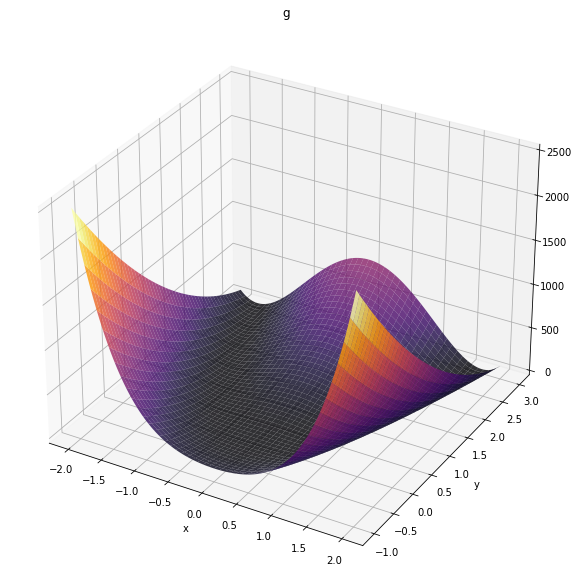

In [200]:
x, y = np.mgrid[-2:2:0.001, -1:3:0.001]
z = g(x, y)
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno', alpha=.8)

plt.title('g')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

–î–∞–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∏–º–µ–µ—Ç –≥–ª–æ–±–∞–ª—å–Ω—ã–π –º–∏–Ω–∏–º—É–º –≤ —Ç–æ—á–∫–µ (1, 1), –≥–¥–µ $g(1, 1)=0$

In [238]:
def annealing(func, t0, x0, y0):
    def neighbour(x, y, t):
        return np.random.normal([x, y], t)

    def cooling(i):
        return t0 / np.log(i+1)

    def coord_new(x, y, t, i):
        t = cooling(i)
        x_new, y_new = neighbour(x, y, t)
        diff = func(x_new, y_new) - func(x, y)
        
        if diff < 0:
            return x_new, y_new, t, diff, 1
        p = np.exp(-diff/t)

        accept = np.random.rand() < p
        if accept:
            return x_new, y_new, t, diff, 1
        else:
            return x, y, t, -1, 0

    start = time()
    iterations = 1
    accept = 0
    x, y, t = x0, y0, t0
    diff = -1
    while abs(diff)>1e-8 and iterations < int(1e7):
        x, y, t, diff, acc = coord_new(x, y, t, iterations)
        accept += acc
        iterations += 1
    iterations -= 1
    return func(x, y), x, y, accept / iterations, iterations, time() - start

–õ–µ–≥–µ–Ω–¥–∞ –≥–ª–∞—Å–∏—Ç, —á—Ç–æ –µ—Å–ª–∏ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –±–æ–ª—å—à—É—é –Ω–∞—á–∞–ª—å–Ω—É—é —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É –∏ –¥–æ–ª–≥–æ –∂–¥–∞—Ç—å, —Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º —Å–æ–π–¥–µ—Ç—Å—è:

In [240]:
t0 = 10
x0 = 3
y0 = 3
g_min, x_min, y_min, accept_ratio, iterations, tm = annealing(g, t0, x0, y0)
print('–ú–∏–Ω–∏–º—É–º —Ñ—É–Ω–∫—Ü–∏–∏ {:5f}'.format(g_min))
print('—Ç–æ—á–∫–∞ –º–∏–Ω–∏–º—É–º–∞ —Ñ—É–Ω–∫—Ü–∏–∏ ({:5f}, {:5f})'.format(x_min, y_min))
print('–î–æ–ª—è –ø—Ä–∏–Ω—è—Ç–∏—è —Ç–æ—á–µ–∫ {:5f}'.format(accept_ratio))
print('–æ–±—â–µ–µ —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π {:d}'.format(iterations))
print('–æ–±—â–µ–µ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã {:5f}'.format(tm))

–ú–∏–Ω–∏–º—É–º —Ñ—É–Ω–∫—Ü–∏–∏ 0.165514
—Ç–æ—á–∫–∞ –º–∏–Ω–∏–º—É–º–∞ —Ñ—É–Ω–∫—Ü–∏–∏ (1.406608, 1.979901)
–î–æ–ª—è –ø—Ä–∏–Ω—è—Ç–∏—è —Ç–æ—á–µ–∫ 0.048473
–æ–±—â–µ–µ —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π 9999999
–æ–±—â–µ–µ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã 265.123440


–°—Ä–∞–≤–Ω–∏–º —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –º–µ—Ç–æ–¥–æ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–π –≤—ã—à–µ–ª –∏–∑ —Ç–æ–π –∂–µ —Ç–æ—á–∫–∏:

In [138]:
from scipy.optimize import minimize, rosen

res = minimize(rosen, [x0, y0], method='CG', tol=1e-6)
print(res)

     fun: 2.7228998559315853e-12
     jac: array([ 2.27678204e-05, -5.29118038e-06])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 439
     nit: 24
    njev: 107
  status: 2
 success: False
       x: array([1.00000161, 1.0000032 ])


# Task 8
## –†–µ—à–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–π –∫—Ä–∞–µ–≤–æ–π –∑–∞–¥–∞—á–∏ –º–µ—Ç–æ–¥–æ–º –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ
–ü—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ç–æ–¥ –ú–æ–Ω—Ç–µ‚Äì–ö–∞—Ä–ª–æ –∫ —Ä–µ—à–µ–Ω–∏—é –ø–µ—Ä–≤–æ–π –∫—Ä–∞–µ–≤–æ–π –∑–∞–¥–∞—á–∏ –¥–ª—è –¥–≤—É–º–µ—Ä–Ω–æ–≥–æ
—É—Ä–∞–≤–Ω–µ–Ω–∏—è –õ–∞–ø–ª–∞—Å–∞ –≤ –µ–¥–∏–Ω–∏—á–Ω–æ–º –∫—Ä—É–≥–µ:  


–ë—É–¥–µ–º –∏—Å–∫–∞—Ç—å —á–∏—Å–ª–µ–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø–æ **–∞–ª–≥–æ—Ä–∏—Ç–º—É**:
1. –ü–æ—Å—Ç—Ä–æ–∏–º —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—É—é —Å–µ—Ç–∫—É. –í—ã–¥–µ–ª–∏–º –Ω–∞ –Ω–µ–π –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –∏ –≥—Ä–∞–Ω–∏—á–Ω—ã–µ —Ç–æ—á–∫–∏ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ ùê∑. –ì—Ä–∞–Ω–∏—á–Ω—ã–º–∏ —Ç–æ—á–∫–∞–º–∏ –Ω–∞–∑–æ–≤–µ–º —Ç–∞–∫–∏–µ —Ç–æ—á–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç –º–µ–Ω–µ–µ —á–µ—Ç—ã—Ä—ë—Ö —Å–æ—Å–µ–¥–µ–π –∏–∑ ùê∑.
2. –í –≥—Ä–∞–Ω–∏—á–Ω—ã—Ö —Ç–æ—á–∫–∞—Ö –ø–æ–ª–æ–∂–∏–º $u(x, y) = f(x, y)$.
3. –í–æ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏—Ö —Ç–æ—á–∫–∞—Ö $(x, y)$ –±—É–¥–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –¥–µ–π—Å—Ç–≤–∏—è:   
   (a) n —Ä–∞–∑ —Ç. $(x, y)$ –æ—Ç–ø—Ä–∞–≤–∏–º —Ç–æ—á–∫—É –±–ª—É–∂–¥–∞—Ç—å, –ø–æ–∫–∞ –æ–Ω–∞ –Ω–µ –¥–æ—Å—Ç–∏–≥–Ω–µ—Ç –≥—Ä–∞–Ω–∏—á–Ω–æ–π —Ç–æ—á–∫–∏ $(x^{(k)}, y^{(k)})$ (—Å —Ä–∞–≤–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –±—É–¥–µ–º –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å –≤ –æ–¥–Ω—É –∏–∑ —Å–æ—Å–µ–¥–Ω–∏—Ö —Ç–æ—á–µ–∫).  
   (b) –ü–æ–ª–æ–∂–∏–º –≤ –¥–∞–Ω–Ω–æ–π –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–π —Ç–æ—á–∫–µ $u(x, y) = \dfrac{1}{n} \sum_{k=1}^n f(x^{(k)}, y^{(k)})$

–ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å —Ç–æ—á–∫—É –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–π, –µ—Å–ª–∏ –æ–Ω–∞ –∏ –µ–µ 4 —Å–æ—Å–µ–¥–∞ –ª–µ–∂–∞—Ç –≤–Ω—É—Ç—Ä–∏ –æ–±–ª–∞—Å—Ç–∏. –¢–∞–∫–∂–µ —è —Å—á–∏—Ç–∞—é, —á—Ç–æ —Ç–æ—á–∫–∏, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö —Ç–∞–∫–æ–π –ø–æ–¥—Å—á–µ—Ç –¥–∞–µ—Ç 3 –∏–ª–∏ 4 —è–≤–ª—è—é—Ç—Å—è –≥—Ä–∞–Ω–∏—á–Ω—ã–º–∏, –∞ –æ—Å—Ç–∞–ª—å–Ω—ã–µ (0, 1 –∏ 2) –ª–µ–∂–∞—Ç –≤–Ω–µ –æ–±–ª–∞—Å—Ç–∏.

In [398]:
def dirichlet_monte_carlo_matrix(X, Y, niter=10**6):
    def f(x, y):
        return x**2 - y**2

    D = X**2 + Y**2 <= 1

    
    int_D = np.zeros(X.shape, dtype=int)
    int_D[1:X.shape[0]-1,1:X.shape[1]-1] = 1*D[1:X.shape[0]-1,1:X.shape[1]-1] +\
                                           D[0:X.shape[0]-2,1:X.shape[1]-1] +\
                                           D[2:X.shape[0],1:X.shape[1]-1] +\
                                           D[1:X.shape[0]-1,0:X.shape[1]-2] +\
                                           D[1:X.shape[0]-1,2:X.shape[1]]
    
    int_D[int_D <= 2] = 0
    int_D[(int_D > 2) *  (int_D < 5)] = 1

    pos_x, pos_y = np.where(int_D == 1)
    pos = np.array([pos_x[0], pos_y[0]])
    temp = f(X[pos], Y[pos])

    direc = np.zeros(2)
    for d in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
        d = np.array(d)
        pos_next = pos+d
        if int_D[pos_next[0], pos_next[1]] == 5:
            direc = -d
            break
    
    temp_sum = np.zeros(X.shape)
#     temp_sum[int_D != 5] = np.inf
    n_visit = np.zeros(X.shape)
#     n_visit[int_D != 5] = np.inf

    for i in range(niter):
        if int_D[pos[0], pos[1]] == 1:
            temp = f(X[pos], Y[pos])
            direc = -direc
        elif int_D[pos[0], pos[1]] == 5:
            direc = np.zeros(2, dtype=int)
            direc[np.random.randint(2)] = 2*np.random.randint(2)-1
            
            temp_sum[pos] += temp
            n_visit[pos] += 1
        else:
            print('ALARM')
            print('Take another grid')
            break
    
        pos += direc

    u = temp_sum/n_visit
    return u

In [401]:
h = 0.01

# –Ω—É–∂–Ω–æ –∑–∞–¥–∞–≤–∞—Ç—å —Å–µ—Ç–∫—É —Ç–∞–∫, —á—Ç–æ–±—ã –æ–Ω–∞ –Ω–µ–º–Ω–æ–≥–æ –≤—ã—Ö–æ–¥–∏–ª–∞ –∑–∞ –≥—Ä–∞–Ω–∏—Ü—É, —á—Ç–æ–±—ã —ç—Ç—É –≥—Ä–∞–Ω–∏—Ü—É –ø–æ—Ç–æ–º –Ω–∞–π—Ç–∏
X, Y = np.mgrid[-1.01:1.2:h, -1.01:1.2:h]
u = dirichlet_monte_carlo_matrix(X, Y, niter=10**5)

C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


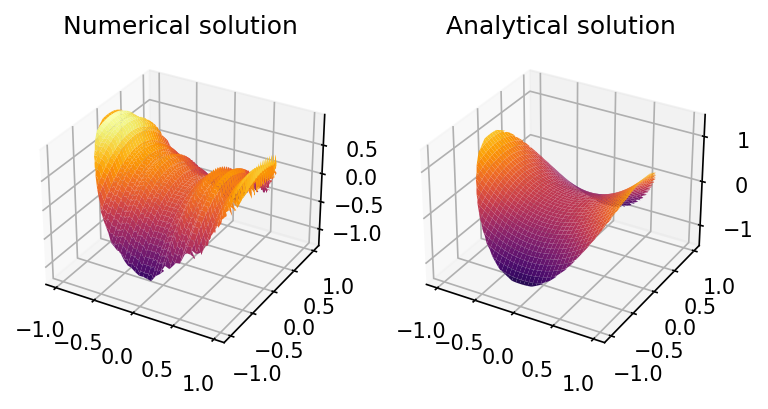

In [402]:
fig = plt.figure()
fig.dpi = 150

# –ø—Ä–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏, –≤—Å–µ —Ç–æ—á–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –ø–æ—Å—á–∏—Ç–∞–ª–æ—Å—å –∏–ª–∏ –Ω–µ –ø–æ–ø–∞–ª–∏ –≤ –∫—Ä—É–≥ - –æ—Ç–Ω–µ—Å–µ–º –≤ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç—å
X_num = X.copy()
X_num[X**2 + Y**2 > 1] = np.inf
bad_val = np.isnan(u)
X_num[bad_val] = np.inf
u[bad_val] = 0

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X_num, Y, u, cmap='inferno')
plt.title('Numerical solution')

ax = fig.add_subplot(122, projection='3d')
u_analytical = X**2 - Y**2
X[X**2 + Y**2 > 1] = np.inf
ax.plot_surface(X, Y, u_analytical, cmap='inferno')
plt.title('Analytical solution')
plt.show()

Text(0.5, 0.92, 'Residual')

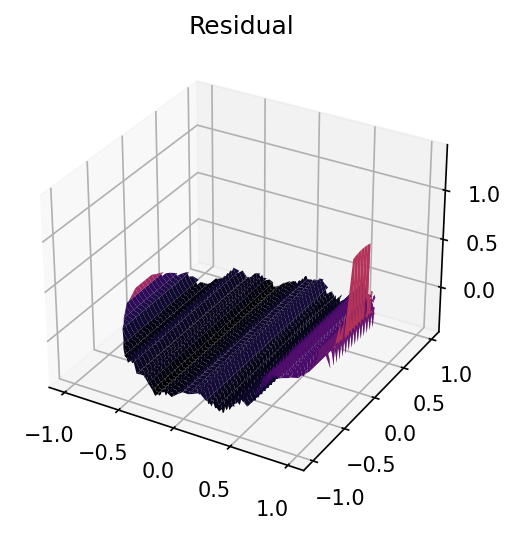

In [405]:
fig = plt.figure()
fig.dpi = 150

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u_analytical - u, cmap='inferno')
plt.title('Residual')

# fig.savefig('/pictires/8_3.pdf', bbox_inches='tight')

# Task 9
# –í–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å –∏ –ø—Ä–æ—Ü–µ—Å—Å –û—Ä–Ω—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞

#### –†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –¥–≤–∞ –≤–∏–¥–∞ –ø—Ä–æ—Ü–µ—Å—Å–æ–≤:
- –í–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å $W(t), t \in [0, 1], \ W(0) = 0.$

- –ü—Ä–æ—Ü–µ—Å—Å –û—Ä–Ω—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞ $X(t),\ t \in [0, 1], \ X(0) = X_0$, —Ç–æ –µ—Å—Ç—å —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π –º–∞—Ä–∫–æ–≤—Å–∫–∏–π –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å. –ù–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ $X_0$ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º —Ç–∞–∫, —á—Ç–æ–±—ã –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å –±—ã —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º.


## Task 9.1
### –ù–∞–π—Ç–∏ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –∏ –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏.

#### –í–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å

–°–ª—É—á–∞–π–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å $W(t)$, –≥–¥–µ $t \geq 0$ –Ω–∞–∑—ã–≤—ã–∞–µ—Ç—Å—è –í–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–º –ø—Ä–æ—Ü–µ—Å—Å–æ–º, –µ—Å–ª–∏
- $W(t)$ - –ø—Ä–æ—Ü–µ—Å—Å —Å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è–º–∏
- $W(0) \overset{\text{–ø.–Ω.}}{=} 0$
- $W(t + h) - W(t) \sim \mathcal{N}(0, \sigma^2h), \forall t \geq 0, h > 0$

–ù–∞–π–¥–µ–º –µ–≥–æ *–∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ñ—É–Ω–∫—Ü–∏—é*:  
–¢–∞–∫ –∫–∞–∫ $W(t) \sim W(0) + \mathcal{N}(0, \sigma^2 t) \sim \mathcal{N}(0, \sigma^2 t)$, —Ç–æ $\mathbb{E}W(t) = 0$   
$$ K(t_1, t_2) = \mathbb{E}\biggl[ (W(t_1) - \mathbb{E}W(t_1))(W(t_2) - \mathbb{E}W(t_2))\biggr] =  \mathbb{E}\biggl[W(t_1)W(t_2)\biggr] = \{t_1 < t_2\} = \mathbb{E}\biggl[W(t_1)(W(t_2)-W(t_1)+W(t_1))\biggr] = \\
= \mathbb{E}W^2(t_1) +  + \mathbb{E}W(t_1)\mathbb{E}[W(t_2) - W(t_1)] = \sigma^2 t_1,$$
–û—Ç–∫—É–¥–∞ $K(t_1, t_2) = \sigma^2 \min(t_1, t_2).$
\
\
\
–ù–∞–π–¥–µ–º *–ø–µ—Ä–µ—Ö–æ–¥–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏*:
–ü—É—Å—Ç—å $t_1 < t_2 < t_3$, –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $P(W(t_2)=x_2|W(t_1) = x_1, W(t_3) = x_3)$. 
–¢–∞–∫ –∫–∞–∫ $W(t)$ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ $0$ –∏ $\sigma^2t$, $Y$ –∏–º–µ–µ—Ç –ø–ª–æ—Ç–Ω–æ—Å—Ç—å
$$P(W(t_2)=x_2|W(t_1) = x_1, W(t_3) = x_3) = \dfrac{P(W(t_1) = x_1, W(t_2)=x_2, W(t_3) = x_3)}{P(W(t_1) = x_1, W(t_3) = x_3)}$$

–ò–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å $n$-–º–µ—Ä–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ–º $\mu$ –∏ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ–π $\Sigma$ –∏–º–µ–µ—Ç –≤–∏–¥
\begin{equation}
P(x) = \dfrac{1}{\sqrt{(2\pi)^n|\Sigma|}}\exp\left\{-\frac{1}{2} (x - \mu)^T\Sigma^{-1} (x - \mu)\right\},
\end{equation}
–≥–¥–µ $x = (x_1, \dots, x_n), \ \Sigma_{ij} = cov(x_i, \, x_j).$  

–¢–∞–∫ –∫–∞–∫ $K(t_i, t_j) = \sigma^2 \min(t_i, t_j)$, –ø–æ–ª—É—á–∞–µ–º —Å–ª–µ–¥—É—é—â–∏–µ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã
$$
\Sigma_{13} = \sigma^2 \begin{pmatrix} 
t_1 & t_1 \\
t_1 & t_3
\end{pmatrix},
\text{- –¥–ª—è } W(t_1), W(t_3)
$$
$$
\Sigma_{123} = \sigma^2 \begin{pmatrix}
t_1 & t_1 & t_1 \\
t_1 & t_2 & t_2 \\
t_1 & t_2 & t_3
\end{pmatrix}
\text{- –¥–ª—è } W(t_1), W(t_2), W(t_3)
$$
\
\
–ü–æ–¥—Å—Ç–∞–≤–∏–º –∏—Ö –∏ –Ω–∞–π–¥–µ–º —Ä–∞—Å–ø—Ä–µ–ª–µ–Ω–∏–µ:  
$P(W(t_2)=x_2|W(t_1) = x_1, W(t_3) = x_3) = Const \exp\left\{ -\dfrac12\dfrac{4}{(t_3 - t_1)\sigma^2} \left(x_2 - \dfrac{x_1 + x_3}2\right)^2\right\}$  
–¢–æ –µ—Å—Ç—å $P(W(t_2)|W(t_1) = x_1, W(t_3) = x_3) = \mathcal{N}\left(W(t_2)|\dfrac{x_1 + x_3}{2}, \dfrac{(t_3-t_1)\sigma^2}{4}\right).$


#### –ü—Ä–æ—Ü–µ—Å—Å –û—Ä—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞
–ü—Ä–æ—Ü–µ—Å—Å –û—Ä–Ω—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞ - –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å, —è–≤–ª—è—é—â–∏–π—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º –∏ –æ–±–ª–∞–¥–∞—é—â–∏–π –º–∞—Ä–∫–æ–≤—Å–∫–∏–º —Å–≤–æ–π—Å—Ç–≤–æ–º.

*–ö–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è*
–ò–∑ —ç—Ç–∏—Ö —Å–≤–æ–π—Å—Ç–≤ —Å–ª–µ–¥—É–µ—Ç, —á—Ç–æ –¥–ª—è  –ø—Ä–æ—Ü–µ—Å—Å–∞ –±—É–¥–µ—Ç –≤—ã–ø–æ–ª–Ω—è—Ç—å—Å—è —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ:
$$corr(X(t_1), X(t_3)) = corr(X(t_1), X(t_2))corr(X(t_2), X(t_3)), \quad \forall t_1 < t_2 < t_3,$$
–∏ —á—Ç–æ —Ç–∞–∫–∂–µ $$K(t, s) = k(|t-s|),$$
–æ—Ç–∫—É–¥–∞ $corr(t_3-t_1) = corr(t_2-t_1) corr(t_3-t_2)$.  
–¢–æ –µ—Å—Ç—å $$corr(t+s) = corr(t)corr(s). $$
–û–±–æ–∑–Ω–∞—á–∏–º $f(x) = \ln corr(x)$, —Ç–æ–≥–¥–∞ –ø—Ä–æ–ª–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–≤ –ø—Ä–æ—à–ª–æ–µ —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ, –ø–æ–ª—É—á–∏–º $f(t+s) = f(t) + f(s)$. –≠—Ç–æ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ –ö–æ—à–∏, —Ä–µ—à–µ–Ω–∏–µ–º —è–≤–ª—è–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è $f(x) = ax$,  —Ç–æ –µ—Å—Ç—å 
$$corr(x) = \exp{f(x)} = e^{ax}$$


–ë–µ–∑ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –æ–±—â–Ω–æ—Å—Ç–∏ X(0) = 0. –¢–æ–≥–¥–∞ $X(t) \sim \mathcal{N}(0, \sigma^2),$ –∏ $k(|t-s|) = \sigma^2 corr(t, s),$ 


–¢–∞–∫ –∫–∞–∫ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –æ–≥—Ä–∞–Ω–Ω–∏—á–µ–Ω–Ω–∞, —Ç–æ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –≤–∏–¥ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏:
$$K(t, s) = k(|t-s|) = \sigma^2 e^{-\theta |t-s|}, \theta > 0$$
\
\
\
–ù–∞–π–¥–µ–º *–ø–µ—Ä–µ—Ö–æ–¥–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏*:  
–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –í–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–º—É –ø—Ä–æ—Ü–µ—Å—Å—É –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã —Å.–≤. $X(t_1), X(t_2) –∏ X(t_3) , \quad \forall t_1 < t_2 < t_3$:  
$$
\Sigma_{13} = \sigma^2 \begin{pmatrix} 
1 & e^{-\theta (t_3 - t_1)} \\
e^{-\theta (t_3 - t_1)} & 1
\end{pmatrix},
\text{- –¥–ª—è } X(t_1), X(t_3)
$$
$$
\Sigma_{123} = \sigma^2 \begin{pmatrix}
1 & e^{-\theta (t_2 - t_1)} & e^{-\theta (t_3 - t_1)} \\
e^{-\theta (t_2 - t_1)} & 1 & e^{-\theta (t_3 - t_2)} \\
e^{-\theta (t_3 - t_1)} & e^{-\theta (t_3 - t_2)} & 1
\end{pmatrix}
\text{- –¥–ª—è } X(t_1), X(t_2), X(t_3)
$$
–û–±–æ–∑–Ω–∞—á–∏–º —à–∞–≥ –Ω–æ–≤–æ–π —Å–µ—Ç–∫–∏ –∑–∞ $h = t_2 - t_1 = t_3 - t_2$ –∏ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –Ω–∞–π–¥–µ–º —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
$$P(X(t_2)=x_2|X(t_1) = x_1, X(t_3) = x_3) = \dfrac{P(X(t_1) = x_1, X(t_2)=x_2, X(t_3) = x_3)}{P(X(t_1) = x_1, X(t_3) = x_3)}$$
–ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –ø–æ–ª—É—á–∏–º $$P(X(t_2)|X(t_1) = x_1, X(t_3) = x_3) = \mathcal{N}\left(X(t_2)|\dfrac{x_1 + x_3}{e^{\theta h} + e^{-\theta h}}, \dfrac{\sigma^2 (e^{2\theta h} - 1)}{e^{2\theta h} + 1} \right)$$


## Task 9.2-9.3

### –ü—Ä–æ–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞ —Å –¥–∞–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã–º–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏ –º–µ—Ç–æ–¥–æ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ä–∞–∑–±–∏–µ–Ω–∏—è –æ—Ç—Ä–µ–∑–∫–∞ –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π.

**–ú–µ—Ç–æ–¥ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ä–∞–∑–±–∏–µ–Ω–∏—è –æ—Ç—Ä–µ–∑–∫–∞**:  
–ü—É—Å—Ç—å —Ç—Ä–µ–±—É–µ—Ç—Å—è —Å–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å —Å–ª—É—á–∞–π–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å $X(t)$ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ $[0, 1]$. 
1. –ú–æ–¥–µ–ª–∏—Ä—É–µ—Ç—Å—è $X_0 = X(0)$.
2. –ú–æ–¥–µ–ª–∏—Ä—É–µ—Ç—Å—è $X(1)$ –ø–æ —É—Å–ª–æ–≤–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é $P(X(1)|X(0))$.
3. –ü–æ –∑–Ω–∞–Ω–∏—é –ø—Ä–æ—Ü–µ—Å—Å–∞ –≤ —É–∑–ª–∞—Ö —Å–µ—Ç–∫–∏ $t_1, t_2$ –º–æ–¥–µ–ª–∏—Ä—É–µ–º –ø—Ä–æ—Ü–µ—Å—Å –≤ —É–∑–ª–µ $t = \dfrac{t_1 + t_2}{2}$, –∏—Å–ø–æ–ª—å–∑—É—è —É—Å–ª–æ–≤–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã $[X(t)|X(t_1) = x_1, X(t_2) = x_2]$.
4. –†–∞–∑–±–∏–µ–Ω–∏–µ –æ—Ç—Ä–µ–∑–∫–∞ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç—Å—è, –ø–æ–∫–∞ —Å–µ—Ç–∫–∞ –Ω–µ —Å—Ç–∞–Ω–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–µ–ª–∫–æ–π.

### –í–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å

–í —Å–ª—É—á–∞–µ –í–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ $P(X(1) | X(0)) = \mathcal{N} (X(1) | 0, \sigma^2)$.  
$P(W(t_2)|W(t_1) = x_1, W(t_3) = x_3) = \mathcal{N}\left(W(t_2)|\dfrac{x_1 + x_3}{2}, \dfrac{(t_3-t_1)\sigma^2}{4}\right).$

–¢–∞–∫–∂–µ –±—É–¥–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–≤–æ–π—Å—Ç–≤–æ–º:
$$X = a + bY, \text{–≥–¥–µ }  X \sim \mathcal{N}(a, b^2), \ Y \sim \mathcal{N}(0, 1)$$

–ï—Å–ª–∏ –º—ã —Ö–æ—Ç–∏–º –∏–º–µ—Ç—å k —Ç–æ—á–µ–∫ –ø—Ä–æ—Ü–µ—Å—Å–∞, —Ç–æ –Ω–∞–π–¥–µ–º, –∫–∞–∫–æ–µ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑ –Ω—É–∂–Ω–æ –∏–∑–º–µ–ª—å—á–∞—Ç—å —Å–µ—Ç–∫—É, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –Ω–µ –º–µ–Ω–µ–µ k —Ç–æ—á–µ–∫.  
–ó–∞ n –æ–ø–µ—Ä–∞—Ü–∏–π –∏–∑–º–µ–ª—å—á–µ–Ω–∏—è –ø–æ–ª—É—á–∏–º $1+2+\dots+2^{n-1} = 2^n - 1$ —Ç–æ—á–µ–∫ + –∏—Å—Ö–æ–¥–Ω—ã–µ 2.
–¢–æ –µ—Å—Ç—å –º—ã —Ö–æ—Ç–∏–º, —á—Ç–æ–±—ã $k \leq 2^n+1$, –æ—Ç–∫—É–¥–∞
$$n \geq \log_2{(k-1)}$$

In [97]:
# –º–æ–¥–µ–ª–∏—Ä—É–µ—Ç k —Ç–æ—á–µ–∫ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞
def WienerProcess(sigma, k):
    n = ceil(np.log(k-1)/np.log(2))
    W = np.zeros(2**n+1)
    W[-1] = sigma * np.random.randn()
    step = 2**n
    h = 1
    for i in range(n):
        W[step//2::step] = (W[:-1:step] + W[step::step]) / 2 + np.sqrt(h / 4) * sigma * np.random.randn(2**i)
        step = step // 2
        h /= 2
    
    # –≤–µ—Ä–Ω–µ–º —Ç—Ä–µ–±—É–µ–º—ã–µ k –∏ —Ç–æ—á–∫–∏, –≥–¥–µ –ø–æ—Å—á–∏—Ç–∞–Ω –ø—Ä–æ—Ü–µ—Å—Å
    points = np.linspace(0, 1, 2**n+1)
    idx = np.arange(k-1)
    idx = np.append(idx, -1)
    return points[idx], W[idx]

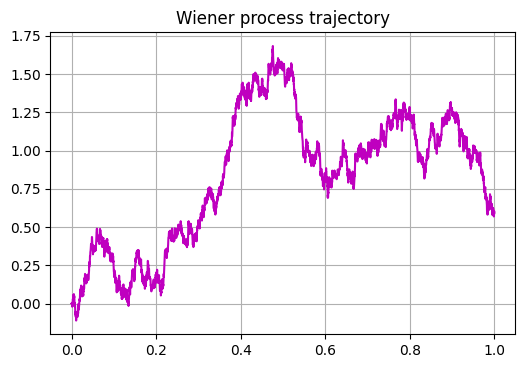

In [280]:
# –±—É–¥–µ—Ç –∫—Ä–∞—Å–∏–≤–µ–µ, –µ—Å–ª–∏ k - —Å—Ç–µ–ø–µ–Ω–∏ 2
k = 2**12
sigma = 1
t, W = WienerProcess(sigma, k)

fig, ax = plt.subplots()
fig.dpi = 100

ax.plot(t, W, 'm', ms = 1)
plt.title('Wiener process trajectory')
ax.grid()
plt.show()

### –ü—Ä–æ—Ü–µ—Å—Å –û—Ä—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞
–î–ª—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –û—Ä—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞ $P(X(1) | X(0)) = \mathcal{N} (X(1) | a, b),$ –Ω–∞–π–¥–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.  
–ö–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –¥–ª—è $(X(0), X(1))$ –∏–º–µ–µ—Ç –≤–∏–¥ 
$$
\Sigma = \sigma^2 \begin{pmatrix} 
1 & e^{-\theta} \\
e^{-\theta} & 1
\end{pmatrix}.
$$
–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø–æ —Ñ–æ—Ä–º—É–ª–µ –ë–∞–π–µ—Å–∞ –ø–æ–ª—É—á–∏–º $P(X(1) | X(0)) = \mathcal{N} \biggl( X(1) | X(0)e^{-\theta}, \sigma^2 (1 -e^{-2\theta}) \biggr)$

$$P(X(t_2)|X(t_1) = x_1, X(t_3) = x_3) = \mathcal{N}\left(X(t_2)|\dfrac{x_1 + x_3}{e^{\theta h} + e^{-\theta h}}, \dfrac{\sigma^2 (e^{2\theta h} - 1)}{e^{2\theta h} + 1} \right), \text{–≥–¥–µ } h = \dfrac{t_3-t_1}{2}$$

In [129]:
# –º–æ–¥–µ–ª–∏—Ä—É–µ—Ç k —Ç–æ—á–µ–∫ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞
def OUProcess(sigma, theta, k):
    n = ceil(np.log(k-1)/np.log(2))
    X = np.zeros(2**n+1)
    X[0] = sigma * np.random.randn()
    X[-1] = X[0] * np.exp(-theta) + sigma * np.sqrt(1 - np.exp(-2 * theta)) * np.random.randn()
    step = 2**n
    h = 1/2
    for i in range(n):
        X[step//2::step] = (X[:-1:step] + X[step::step]) / (np.exp(theta*h) + np.exp(-theta*h)) + \
                            sigma*np.sqrt((np.exp(2*theta*h) - 1)/(np.exp(2*theta*h) + 1)) * np.random.randn(2**i)
        step = step // 2
        h /= 2
    
    # –≤–µ—Ä–Ω–µ–º —Ç—Ä–µ–±—É–µ–º—ã–µ k –∏ —Ç–æ—á–∫–∏, –≥–¥–µ –ø–æ—Å—á–∏—Ç–∞–Ω –ø—Ä–æ—Ü–µ—Å—Å
    points = np.linspace(0, 1, 2**n+1)
    idx = np.arange(k-1)
    idx = np.append(idx, -1)
    return points[idx], X[idx]

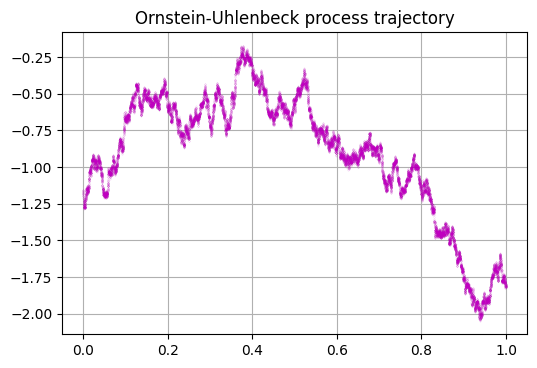

In [130]:
# –±—É–¥–µ—Ç –∫—Ä–∞—Å–∏–≤–µ–µ, –µ—Å–ª–∏ k = —Å—Ç–µ–ø–µ–Ω–∏ 2
k = 2**15
sigma=1
theta = 1
t, X = OUProcess(sigma, lam, k)

fig, ax = plt.subplots()
fig.dpi = 100

ax.plot(t, X, 'm.', ms = 0.1)
plt.title('Ornstein-Uhlenbeck process trajectory')
ax.grid()
plt.show()

# Task 10 –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –û—Ä—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞

## Task 10.1
–ò—Å–ø–æ–ª—å–∑—É—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –±–µ–ª–æ–≥–æ —à—É–º–∞, –¥–æ–±–∞–≤–∏—Ç—å —Å–ª—É—á–∞–π–Ω—É—é –æ—à–∏–±–∫—É —Å –∏–∑–≤–µ—Å—Ç–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π –∫ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞ –û—Ä–Ω—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞.

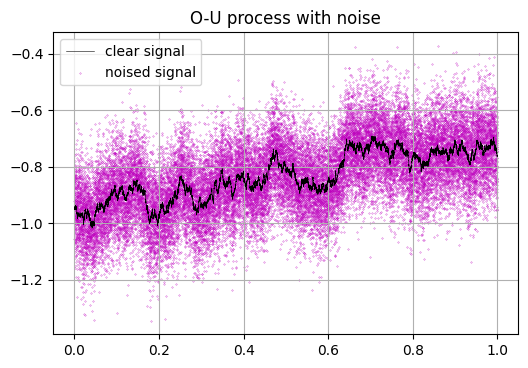

In [198]:
k = 2**15
sigma=1
theta = 0.05
t, X = OUProcess(sigma, theta, k)

r = 0.01
noise = np.sqrt(r) * np.random.randn(k)
Y = X + noise

fig, ax = plt.subplots()
fig.dpi = 100

ax.scatter(t, Y, c='m', s = 0.05, label='noised signal')
ax.plot(t, X, 'k', lw=0.4, label='clear signal')
plt.title('O-U process with noise')
ax.legend()
ax.grid()
plt.show()

## Task 10.2

[**–§–∏–ª—å—Ç—Ä –ö–∞–ª–º–∞–Ω–∞**](https://en.wikipedia.org/wiki/Kalman_filter)

–ü—Ä–∏ –ø–æ–º–æ—â–∏ –æ–¥–Ω–æ–º–µ—Ä–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞ –ö–∞–ª–º–∞–Ω–∞ –æ—Ü–µ–Ω–∏—Ç—å —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—é –ø—Ä–æ—Ü–µ—Å—Å–∞ –ø–æ –∑–∞—à—É–º–ª–µ–Ω–Ω–æ–º—É —Å–∏–≥–Ω–∞–ª—É. –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –ø—Ä–æ—Ü–µ—Å—Å–∞ –∏ –±–µ–ª–æ–≥–æ —à—É–º–∞ —Å—á–∏—Ç–∞—Ç—å –∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–µ—Ç–∫—É $\{t_n = nh, n = 0, 1, \ldots, N\},\ h = \dfrac1N$ –∏ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –û—Ä–Ω—à—Ç–µ–π–Ω–∞-–£–ª–µ–Ω–±–µ–∫–∞ –≤ —Ç–æ—á–∫–∞—Ö —ç—Ç–æ–π —Å–µ—Ç–∫–∏
$x_n = X(t_n).$

–ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º –ø—Ä–æ—Ü–µ—Å—Å –≤ –≤–∏–¥–µ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–π –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–π —Å–∏—Å—Ç–µ–º—ã –≤–∏–¥–∞
$$x_{n+1} = ax_n + \nu_n, \quad \mathrm{i.i.d.}\ \nu_n \sim \mathcal{N}(0, q), \quad x_1 \sim \mathcal{N}(0, \sigma^2).$$
–û–±–æ–∑–Ω–∞—á–∏–º –∑–∞—à—É–º–ª–µ–Ω–Ω—ã–π —Å–∏–≥–Ω–∞–ª
$$y_n = x_n + \varepsilon_n, \quad \mathrm{i.i.d.}\ \varepsilon_n \sim \mathcal{N}(0, r).$$
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã $\sigma, \theta$ –ø—Ä–æ—Ü–µ—Å—Å–∞ —Å—á–∏—Ç–∞–µ–º –∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏. –ó–Ω–∞—á–µ–Ω–∏–µ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ —à—É–º–∞ $r$ —Å—á–∏—Ç–∞–µ—Ç—Å—è –∏–∑–≤–µ—Å—Ç–Ω—ã–º –µ—â–µ –Ω–∞ —ç—Ç–∞–ø–µ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —ç—Ç–æ–≥–æ —à—É–º–∞.

–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —É—Ä–∞–≤–Ω–µ–Ω–∏—è –¥–∏–Ω–∞–º–∏–∫–∏ $a, q$ –∑–∞–ø–∏—à–µ–º –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–æ—Ü–µ—Å—Å–∞ –≤ –º–æ–º–µ–Ω—Ç—ã $t_n$ –∏ $t_{n+1}$:
$$K(t_n, t_n) = \mathrm{Var}(x_n) = \sigma^2,$$
$$K(t_n, t_{n+1}) = \sigma^2 e^{-\theta h} =  a\ \mathrm{Var}(x_n) + 0 = a\sigma^2,$$
$$K(t_{n+1}, t_{n+1}) = \mathrm{Var}(x_{n+1}) = \sigma^2 = a^2\mathrm{Var}(x_n) + q = a^2\sigma^2 + q.$$
–û—Ç–∫—É–¥–∞
$$a = e^{-\theta h}, \quad q = \sigma^2(1 - a^2).$$

**–ü—Ä–æ—Ö–æ–¥ —Ñ–∏–ª—å—Ä–∞ –ö–∞–ª–º–∞–Ω–∞**.  
–ü—É—Å—Ç—å –º—ã –Ω–∞ $n$ —à–∞–≥–µ, –∏–∑–≤–µ—Å—Ç–Ω—ã $y_1, \ldots y_n$.  
–û–±–æ–∑–Ω–∞—á–µ–Ω–∏—è:
- $\hat x_{n|n}$  - –æ—Ü–µ–Ω–∫a –∑–Ω–∞—á–µ–Ω–∏—è $x_n$
- $\hat x_{n+1|n}$ - —ç–∫—Å—Ç—Ä–∞–ø–æ–ª—è—Ü–∏—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–π —à–∞–≥ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–æ–π —Å–∏—Å—Ç–µ–º–æ–π
- $p_{n|n}$ - –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ—à–∏–±–∫–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
- $p_{n+1|n}$ - –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–∞—è –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º —à–∞–≥–µ –¥–∏—Å–ø–µ—Ä—Å–∏—è.

–ê–ª–≥–æ—Ä–∏—Ç–º —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏:
1. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ—Ü–µ—Å—Å–∞ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é –æ—à–∏–±–∫–∏
$$ \hat x_{n+1|n} = a\hat x_{n|n}, \quad p_{n+1|n} = a^2 p_{n|n} + q.$$
2. –°—á–∏–∞–µ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —É—Å–∏–ª–µ–Ω–∏—è –ö–∞–ª–º–∞–Ω–∞
$$ k_{n+1} = \dfrac{p_{n+1|n}}{p_{n+1|n} + r}$$
3. –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
$$ \hat x_{n+1|n+1} = \hat x_{n+1|n} + k_{n+1}(y_{n+1} - \hat x_{n+1|n}), \quad p_{n+1|n+1} = (1 - k_{n+1})p_{n+1|n}. $$

–û—à–∏–±–∫–∞ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª —Å —É—Ä–æ–≤–Ω–µ–º –¥–æ–≤–µ—Ä–∏—è $\alpha$ –±—É–¥–µ—Ç –∏–º–µ—Ç—å –≤–∏–¥
$$[\hat x_{n|n} - \Delta, \, \hat x_{n|n} + \Delta], \quad \Delta = -\sqrt{p_{n|n}}\Phi^{-1}\left(\dfrac{\alpha}2\right).$$

In [149]:
def KalmanFilter(Y, a, q, r):
    p = np.zeros_like(Y)
    X_estim = np.zeros_like(Y)
    X_estim[0] = Y[0]
    p[0] = r
    for i in range(1, n):
        X_predict = a * X_estim[i - 1]
        p_predict = a**2 * p[i - 1] + q

        k = p_predict / (p_predict + r)

        X_estim[i] = X_predict + k * (Y[i] - X_predict)
        p[i] = (1 - k) * p_predict

    return X_estim, p

## Task 10.3
–†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å —Å–ª—É—á–∞–π, –∫–æ–≥–¥–∞ —à—É–º
  - —è–≤–ª—è–µ—Ç—Å—è –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–º;
  - –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ö–æ—à–∏.

In [248]:
def GaussNoiser(X, r):
    return X + np.sqrt(r) * np.random.randn(X.shape[0])

def CauchyNoiser(X, r):
    return X + r * np.random.standard_cauchy(X.shape[0])

## Gaussian noise

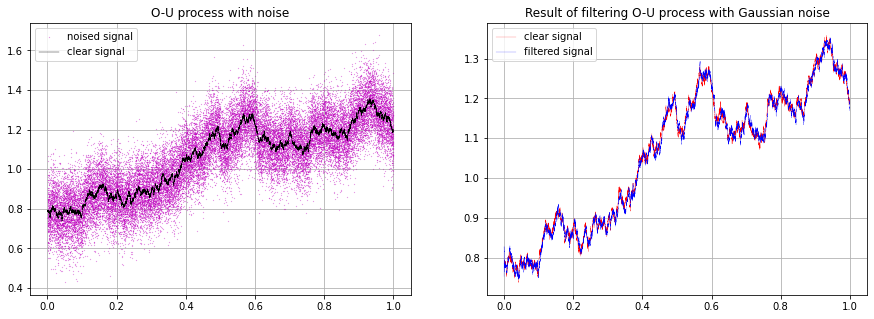

In [269]:
n = 2**15
sigma=1
theta = 0.05
t, X = OUProcess(sigma, theta, n)

r = 0.01
Y = GaussNoiser(X, r)


h = 1 / (n - 1)
a = np.exp(-theta * h)
q = sigma**2 * (1 - a**2)

X_filtered, err = KalmanFilter(Y, a, q, r)

# plot graphics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(t, Y, 'm.', alpha=1, ms = 0.3, label='noised signal')
ax1.plot(t, X, 'k', lw=0.4, label='clear signal')
ax1.set_title('O-U process with noise')
ax1.legend()
ax1.grid()
# plt.show()

ax2.plot(t, X, 'red', lw = 0.2, label='clear signal')
ax2.plot(t, X_filtered, 'blue', lw=0.2, label='filtered signal')
ax2.set_title('Result of filtering O-U process with Gaussian noise')
ax2.legend()
ax2.grid()
# plt.show()

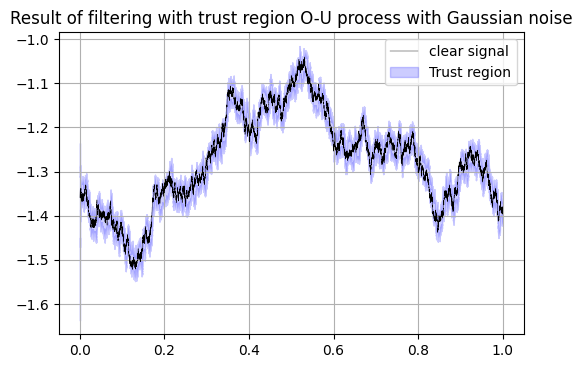

In [206]:
alpha = 0.05
delta = -np.sqrt(err) * scipy.stats.norm.ppf(alpha / 2)

# plot graphics
fig, ax = plt.subplots()
fig.dpi = 100

ax.fill_between(t, X_filtered - delta, X_filtered + delta, alpha=0.2, color='b', label='Trust region')
ax.plot(t, X, 'k', lw=0.3, label='clear signal')
plt.title('Result of filtering with trust region O-U process with Gaussian noise')
ax.legend()
ax.grid()
plt.show()

## Cauchy noise

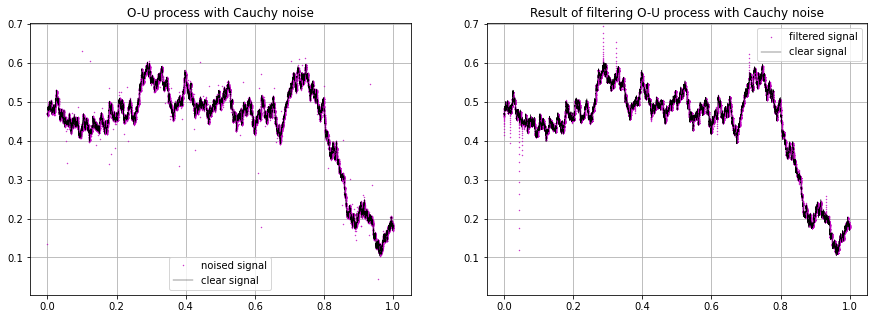

In [278]:
n = 2**15
sigma=1
theta = 0.05
t, X = OUProcess(sigma, theta, n)

r = 1e-4
Y = CauchyNoiser(X, r)


h = 1 / (n - 1)
a = np.exp(-theta * h)
q = sigma**2 * (1 - a**2)

X_filtered, err = KalmanFilter(Y, a, q, r)

# plot graphics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(t, Y, 'm.', ms=0.8, label='noised signal')
ax1.plot(t, X, 'k', lw=0.4, label='clear signal')
ax1.set_title('O-U process with Cauchy noise')
ax1.set_ylim(np.min(X) - 0.1, np.max(X) + 0.1)
ax1.legend()
ax1.grid()
# plt.show()

ax2.plot(t, X_filtered, 'm.', ms=0.8, label='filtered signal')
ax2.plot(t, X, 'k', lw = 0.4, label='clear signal')
ax2.set_title('Result of filtering O-U process with Cauchy noise')
ax2.set_ylim(np.min(X) - 0.1, np.max(X) + 0.1)
ax2.legend()
ax2.grid()
# plt.show()

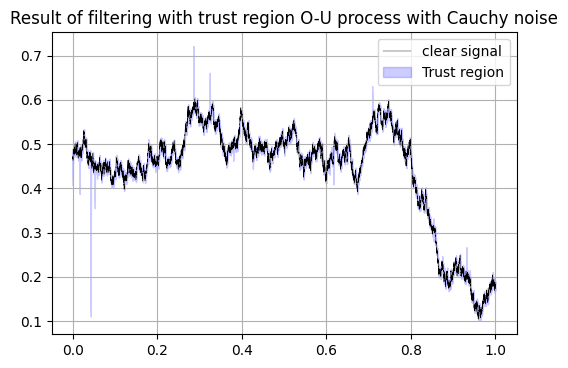

In [279]:
import scipy.stats

alpha = 0.05
delta = -np.sqrt(err) * scipy.stats.norm.ppf(alpha / 2)

# plot graphics
fig, ax = plt.subplots()
fig.dpi = 100

ax.fill_between(t, X_filtered - delta, X_filtered + delta, alpha=0.2, color='b', label='Trust region')
ax.plot(t, X, 'k', lw=0.3, label='clear signal')
plt.title('Result of filtering with trust region O-U process with Cauchy noise')
ax.legend()
ax.grid()
plt.show()

# Task 10 –ü—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–æ–µ –ø–æ–ª–µ

–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–≤—É–º–µ—Ä–Ω–æ–µ –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–æ–µ –ø–æ–ª–µ, –æ—Ç–≤–µ—á–∞—é—â–µ–µ —Å–ª–æ–∂–Ω–æ–º—É –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–æ–º—É –ø—Ä–æ—Ü–µ—Å—Å—É. –î–ª—è –∫–∞–∂–¥–æ–π —Å–∏—Å—Ç–µ–º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ —Å–ª—É—á–∞–∏ –ø–æ–≤–µ–¥–µ–Ω–∏—è —Å–∏—Å—Ç–µ–º—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

–ü—É—Å—Ç—å $\lambda > 0.$. –°–ª—É—á. –ø—Ä–æ—Ü–µ—Å—Å $X_t$ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–º **–ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–º –ø—Ä–æ—Ü–µ—Å—Å–æ–º** (–ø—Ä–æ—Å—Ç—ã–º) —Å –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å—é $\lambda$, –µ—Å–ª–∏:
- $X(t)$ - –ø—Ä–æ—Ü–µ—Å—Å —Å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è–º–∏
- $X(0) \overset{\text{–ø.–Ω.}}{=} 0$
- $X(t + h) - X(t) \sim \mathcal{Pois}(\lambda h), \forall t \geq 0, h > 0$

–ü—É—Å—Ç—å $\xi_1, \dots, \xi_n$ ‚Äî –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω, –∞ $N(t)$ ‚Äî–ø—Ä–æ—Å—Ç–æ–π –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å —Å –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å—é $\lambda$, –Ω–µ –∑–∞–≤–∏—Å—è—â–∏–π –æ—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ $\xi_1, \dots, \xi_n$. –û–±–æ–∑–Ω–∞—á–∏–º –∑–∞ $S_k$ —Å—É–º–º—É
–ø–µ—Ä–≤—ã—Ö $k$ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤–≤–µ–¥—ë–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –¢–æ–≥–¥–∞ –æ–ø—Ä–µ–¥–µ–ª–∏–º **—Å–ª–æ–∂–Ω—ã–π –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å** $X(t) = S_{N(t)}$.

## Task 10.1 –°–ú–û

–ü–µ—Ä–≤–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: —Å–∏—Å—Ç–µ–º–∞ –º–∞—Å—Å–æ–≤–æ–≥–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è. –ü—Ä–∏ —ç—Ç–æ–º, –ø–µ—Ä–≤–∞—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ –ø–æ–ª—è - –≤—Ä–µ–º—è –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–∫–∏ –≤ –°–ú–û (—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ), –≤—Ç–æ—Ä–∞—è - –≤—Ä–µ–º—è –µ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è (—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\chi^2$ —Å 10 —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã).

**–ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ**:
1. –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º $n \sim Pois(\lambda T)$  - —á–∏—Å–ª–æ –∑–∞—è–≤–æ–∫, –ø–æ—Å—Ç—É–ø–∏–≤—à–∏—Ö –≤ —Å–∏—Å—Ç–µ–º—É –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ $[0, T]$, –≥–¥–µ $\lambda$ - –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ (—Å—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –Ω–æ–≤—ã—Ö –∑–∞—è–≤–æ–∫ –≤ –µ–¥–∏–Ω–∏—Ü—É –≤—Ä–µ–º–µ–Ω–∏).

2. –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º (–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ) –≤—Ä–µ–º–µ–Ω–∞ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –°–ú–û –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ $[0, T]: t_1, \dots, t_n \sim U[0, T]$.
    –£–ø–æ—Ä—è–¥–æ—á–∏–º –≤—Ä–µ–º–µ–Ω–∞ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ –ø–æ –≤—Ä–µ–º–µ–Ω–∏: $t_{(i)}$ - –ø–æ—Ä—è–¥–∫–æ–≤–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, —Ç–æ –µ—Å—Ç—å $0 \leq t_{(1)} \leq \dots \leq t_{(n)} \leq T,$ –∏ –±—É–¥–µ–º –≥–æ–≤–æ—Ä–∏—Ç—å, —á—Ç–æ $i$-–∞—è –∑–∞—è–≤–∫–∞ –ø–æ—Å—Ç—É–ø–∏–ª–∞ –≤ –º–æ–º–µ–Ω—Ç $t_{(i)}$.

    –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º (–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ) –≤—Ä–µ–º–µ–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫ $s_i \sim \chi^2(10), \quad i=0,\dots, n$.
    
3. –î–ª—è –∫–∞–∂–¥–æ–π –∑–∞—è–≤–∫–∏ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –≤—Ä–µ–º—è –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –µ—ë –æ–±—Ä–∞–±–æ—Ç–∫–∏ $X_i$.  
    - –µ—Å–ª–∏ –∫ –º–æ–º–µ–Ω—Ç—É –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è $i$-–π –∑–∞—è–≤–∫–∏ –æ—á–µ—Ä–µ–¥–∏ –Ω–µ—Ç (–ø—Ä–æ—à–ª—É—é –∑–∞—è–≤–∫—É —É—Å–ø–µ–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Ä–∞–Ω—å—à–µ: $X_{i-1} < t_{(i)}$ ), —Ç–æ
    $$X_i = t_{(i)} + s_i$$
    - –∏–Ω–∞—á–µ (–ø—Ä–∏  $X_{i-1} \geq t_{(i)}$), 
    $$X_i = X_{(i-1)} + s_i$$
    
4. –¢–∞–∫–∂–µ –¥–ª—è –∫–∞–∂–¥–æ–π –∑–∞—è–≤–∫–∏ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª—é–¥–µ–π –≤ –æ—á–µ—Ä–µ–¥–∏ $N(t)$.
    - –µ—Å–ª–∏ –∫ –º–æ–º–µ–Ω—Ç—É –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è $i$-–π –∑–∞—è–≤–∫–∏ –æ—á–µ—Ä–µ–¥–∏ –Ω–µ—Ç, —Ç–æ
    $N(t_{(i)}) = 0$
    - –∏–Ω–∞—á–µ $N(t_{(i)})$ —Ä–∞–≤–Ω–æ —á–∏—Å–ª—É –∑–∞—è–≤–æ–∫, –µ—â–µ –Ω–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –∫ –º–æ–º–µ–Ω—Ç—É –≤—Ä–µ–º–µ–Ω–∏ $t_{(i)}$.
    
   –¢–æ –µ—Å—Ç—å $$N(t) = \sum_{j=1}^{n}[t_{(j)} \leq t < X_j].$$


–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤—Ä–µ–º—è –º–µ–∂–¥—É –∑–∞—è–≤–∫–∞–º–∏ –∏–º–µ–µ—Ç —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º $\lambda$, —Ç–æ –µ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –º–µ–∂–¥—É –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ–º –∑–∞—è–≤–æ–∫ —Ä–∞–≤–Ω–æ $\dfrac{1}{\lambda}$. 
–ó–Ω–∞—á–∏—Ç, –º–æ–∂–Ω–æ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å 2 –ø—É–Ω–∫—Ç:
2. –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º (–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ) –≤—Ä–µ–º–µ–Ω–∞ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –°–ú–û –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ $$[0, T]: 0 \leq t_{1} \leq \dots \leq t_{n} \leq T, \text{ –ø—Ä–∏—á–µ–º } t_i - t_{i-1} \sim Exp(\lambda).$$  

–°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –æ–¥–Ω–æ–π –∑–∞—è–≤–∫–∏ —Ä–∞–≤–Ω–æ $\mathbb{E}s_1 = 10$. C—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –º–µ–∂–¥—É –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ–º –∑–∞—è–≤–æ–∫ —Ä–∞–≤–Ω–æ $\dfrac{1}{\lambda}$. –¢–æ–≥–¥–∞:
- –ï—Å–ª–∏ $\dfrac{1}{\lambda} < 10$, —Ç–æ –∑–∞—è–≤–∫–∏ –ø–æ—Å—Ç—É–ø–∞—é—Ç —Å –±–æ–ª—å—à–µ–π —Å–∫–æ—Ä–æ—Å—Ç—å—é, —á–µ–º —É—Å–ø–µ–≤–∞—é—Ç –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å—Å—è, –∏ –æ—á–µ—Ä–µ–¥—å –±—É–¥–µ—Ç –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ —Ä–∞—Å—Ç–∏.
- –ï—Å–ª–∏ $\dfrac{1}{\lambda} > 10 $, —Ç–æ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–µ–≤—ã—à–∞–µ—Ç —Å–∫–æ—Ä–æ—Å—Ç—å –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è, —Å–∏—Å—Ç–µ–º–∞ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –ø–æ—Ç–æ–∫–æ–º –∑–∞—è–≤–æ–∫. 
- $\lambda = \dfrac{1}{10}$ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä–æ–º—É –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–æ–º—É —Å–æ—Å—Ç–æ—è–Ω–∏—é, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º —Å–∫–æ—Ä–æ—Å—Ç—å –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å–æ —Å–∫–æ—Ä–æ—Å—Ç—å—é –∏—Ö –æ–±—Ä–∞–±–æ—Ç–∫–∏.

In [2]:
def QueuingSystem(lam, T, n_grid=10**2):
    n = np.random.poisson(lam * T)
    times = np.sort(T * np.random.rand(n))
    
    s = scipy.stats.chi2.rvs(df=10, size=n)
    X = s.copy()
    for i in range(1, n):
        X[i] += max(X[i - 1], times[i])

    # —Å–¥–µ–ª–∞–µ–º —Å–µ—Ç–∫—É –ø–æ –≤—Ä–µ–º–µ–Ω–∏, —á—Ç–æ–±—ã –ø–æ—Å—á–∏—Ç–∞—Ç—å —á–∏—Å–ª–æ –ª—é–¥–µ–π –≤ –æ—á–µ—Ä–µ–¥–∏ –≤ –∫–∞–∂–¥—ã–π –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏
    # —Ç–∞–∫ –∫–∞–∫ –≤—Å–µ–≥–æ –∑–∞—è–≤–æ–∫ n, —Ç–æ –º–µ–∂–¥—É –º–æ–º–µ–Ω—Ç–∞–º–∏ i –∏ i+1 –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ –±–æ–ª—å—à–µ i –∏–∑–º–µ–Ω–µ–Ω–∏–π —á–∏—Å–ª–∞ –ª—é–¥–µ–π
    # —Ç–æ –µ—Å—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π —Ä–∞–∑–º–µ—Ä —Å–µ—Ç–∫–∏ –ø–æ—Ä—è–¥–∫–∞ n^2
    n_grid = max(n*(n+1)//2, n_grid)
    t_grid = np.linspace(0, T, n_grid)
    N = np.zeros_like(t_grid)
    for i in range(n):
        N += (times[i] <= t_grid) * (t_grid < X[i])
    return times, s, X, N, t_grid

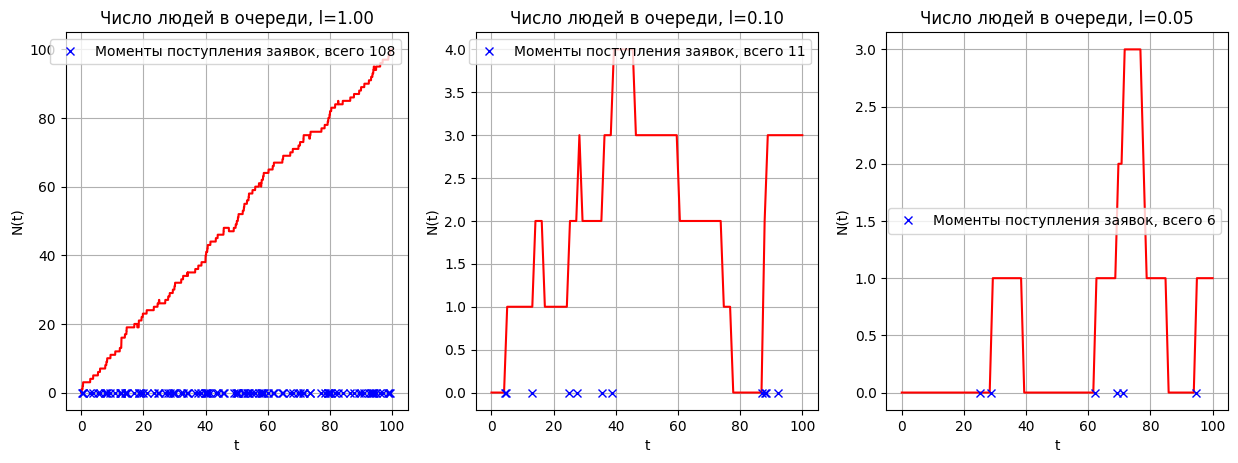

In [6]:
lam = [1, 0.1, 0.05]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.dpi = 100

for i in range(3):
    T = 100
    times, s, X, N, t_grid = QueuingSystem(lam[i], T)

    axes[i].plot(t_grid, N, 'r')
    axes[i].plot(times, np.zeros_like(times), 'xb', label='–ú–æ–º–µ–Ω—Ç—ã –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫, –≤—Å–µ–≥–æ {:d}'.format(X.shape[0]))
    axes[i].grid()
    axes[i].legend()
    axes[i].set_title('–ß–∏—Å–ª–æ –ª—é–¥–µ–π –≤ –æ—á–µ—Ä–µ–¥–∏, l={:.2f}'.format(lam[i]))
    axes[i].set_xlabel('t')
    axes[i].set_ylabel('N(t)')

## Task 10.2 –°–ú–û —Å —Ü–∏–∫–ª. –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å—é –∏ –µ–¥–∏–Ω–∏—á–Ω—ã–º–∏ —Å–∫–∞—á–∫–∞–º–∏

–í—Ç–æ—Ä–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: —Å–∏—Å—Ç–µ–º–∞ –º–∞—Å—Å–æ–≤–æ–≥–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è —Å —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é $\lambda(1 + \cos(t))$ –∏ –µ–¥–∏–Ω–∏—á–Ω—ã–º–∏ —Å–∫–∞—á–∫–∞–º–∏. –°–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—É—é –∑–∞–¥–∞—á—É –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–µ—Ç–æ–¥–∞ –õ—å—é–∏—Å–∞ –∏ –®–∞–¥–ª–µ–∞—Ä–∞ –∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é –¥–≤—É–º–µ—Ä–Ω–æ–≥–æ –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–æ–≥–æ –ø–æ–ª—è, –≥–¥–µ –ø–µ—Ä–≤–∞—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ –∏–º–µ–µ—Ç —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –∞ –≤—Ç–æ—Ä–∞—è - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ë–µ—Ä–Ω—É–ª–ª–∏.



–î–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–Ω–∏—è –°–ú–û —Å —Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–π –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å—é $\lambda(t) = \lambda(1 + \cos(t))$ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ –õ—å—é–∏—Å–∞ –∏ –®–µ–¥–ª–µ–∞—Ä–∞.  
–¢–∞–∫ –∫–∞–∫ $\lambda(t) \leq 2\lambda = \lambda^*$ –¥–ª—è –ª—é–±—ã—Ö $t$, –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–π –ø—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å —Å –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å—é $\lambda^*$. –û–ø–∏—à–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è.

1. –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º $n \sim Pois(\lambda^*T)$ –∏ $t_1^*, \ldots, t_n^* \sim U[0, T]$ - –≤—Ä–µ–º–µ–Ω–∞ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ*.
2. –î–ª—è –∫–∞–∂–¥–æ–≥–æ $j$ –æ—Å—Ç–∞–≤–ª—è–µ–º $t_j^*$ –≤ –≤—ã–±–æ—Ä–∫–µ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $\dfrac{\lambda(t_j^*)}{\lambda^*(t_j^*)} = \dfrac{1+\cos(t)}{2}$.
3. –û—Å—Ç–∞–≤—à–∏–µ—Å—è —Ç–æ—á–∫–∏ —è–≤–ª—è—é—Ç—Å—è –º–æ–º–µ–Ω—Ç–∞–º–∏ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–∫–∏ –≤ –∏–∑ –ø—Ä–æ—à–ª–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏, –º–æ–¥–µ–ª–∏—Ä—É–µ–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ.


In [30]:
def QueuingSystemCycle(lam, T, n_grid=10**2):
    n = np.random.poisson(2 * lam * T)
    times = np.sort(T * np.random.rand(n))
    idx = np.random.rand(n) < (1 + np.cos(times)) / 2
    times = times[idx]
    n = len(times)
    
    s = scipy.stats.chi2.rvs(df=10, size=n)
    X = s.copy()
    for i in range(1, n):
        X[i] += max(X[i - 1], times[i])

#     n_grid = max(n*(n+1)//2, n_grid)
    n_grid = n
    t_grid = np.linspace(0, T, n_grid)
    N = np.zeros_like(t_grid)
    for i in range(n):
        N += (times[i] <= t_grid) * (t_grid < X[i])
    return times, s, X, N, t_grid

19961


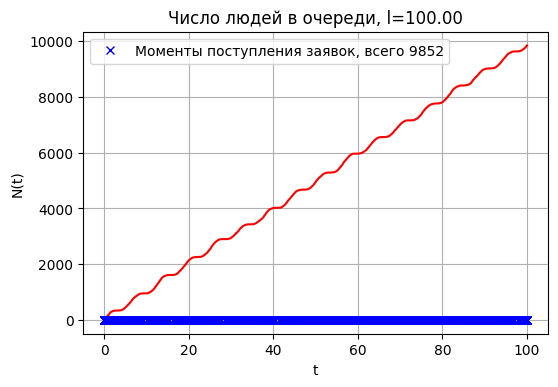

In [31]:
lam = 100

fig, axes = plt.subplots()
fig.dpi = 100

T = 100
times, s, X, N, t_grid = QueuingSystemCycle(lam, T)

axes.plot(t_grid, N, 'r')
axes.plot(times, np.zeros_like(times), 'xb', label='–ú–æ–º–µ–Ω—Ç—ã –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –∑–∞—è–≤–æ–∫, –≤—Å–µ–≥–æ {:d}'.format(X.shape[0]))
axes.grid()
axes.legend()
axes.set_title('–ß–∏—Å–ª–æ –ª—é–¥–µ–π –≤ –æ—á–µ—Ä–µ–¥–∏, l={:.2f}'.format(lam))
axes.set_xlabel('t')
axes.set_ylabel('N(t)');

## Task 10.3 –†–∞–±–æ—Ç–∞ —Å—Ç—Ä–∞—Ö–æ–≤–æ–π –∫–æ–º–ø–∞–Ω–∏–∏
–¢—Ä–µ—Ç—å—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è: —Ä–∞–±–æ—Ç–∞ —Å—Ç—Ä–∞—Ö–æ–≤–æ–π –∫–æ–º–ø–∞–Ω–∏–∏. –ü–µ—Ä–≤–∞—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ - –º–æ–º–µ–Ω—Ç –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Å—Ç—Ä–∞—Ö–æ–≤–æ–≥–æ —Å–ª—É—á–∞—è (—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ), –≤—Ç–æ—Ä–∞—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ - –≤–µ–ª–∏—á–∏–Ω–∞ —É—â–µ—Ä–±–∞ (—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ü–∞—Ä–µ—Ç–æ). –ü–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ –∫–∞–ø–∏—Ç–∞–ª–∞ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –ª–∏–Ω–µ–π–Ω–æ —Å–æ —Å–∫–æ—Ä–æ—Å—Ç—å—é $c > 0$, –Ω–∞—á–∞–ª—å–Ω—ã–π –∫–∞–ø–∏—Ç–∞–ª $W > 0$.

–°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º $n \sim Pois(\lambda T)$  - —á–∏—Å–ª–æ —Å—Ç—Ä–∞—Ö–æ–≤—ã—Ö —Å–ª—É—á–∞–µ–≤, –Ω–∞—Å—Ç—É–ø–∏–≤—à–∏—Ö –≤ —Å–∏—Å—Ç–µ–º–µ –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ $[0, T]$, –∑–∞—Ç–µ–º  –≤—Ä–µ–º–µ–Ω–∞ –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Å—Ç—Ä–∞—Ö–æ–≤—ã—Ö —Å–ª—É—á–∞–µ–≤ –Ω–∞ —ç—Ç–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ $$ 0 \leq t_{1} \leq \dots \leq t_{n} \leq T, \text{ –ø—Ä–∏—á–µ–º } t_i - t_{i-1} \sim Exp(\lambda),$$  –≥–¥–µ $\lambda$ - –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –ø–æ—Ç–æ–∫–∞ —Å—Ç—Ä–∞—Ö–æ–≤—ã—Ö —Å–ª—É—á–∞–µ–≤.

–í–µ–ª–∏—á–∏–Ω–∞ —É—â–µ—Ä–±–∞ $s_i$ –æ—Ç —Å—Ç—Ä–∞—Ö–æ–≤–æ–≥–æ —Å–ª—É—á–∞—è –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ $t_i$ –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ü–∞—Ä–µ—Ç–æ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ $x_m$ –∏ $k$.

–í–µ–ª–∏—á–∏–Ω–∞ –∫–∞–ø–∏—Ç–∞–ª–∞ –∫–æ–º–ø–∞–Ω–∏–∏ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ t –≤—ã—Ä–∞–∂–∞–µ—Ç—Å—è –∫–∞–∫:
$$W(t) = W_0 + ct ‚àí S(t),$$
–≥–¥–µ $S(t)$ - —Å—É–º–º–∞ –≤–µ–ª–∏—á–∏–Ω —É—â–µ—Ä–±–∞ —Å—Ç—Ä–∞—Ö–æ–≤—ã—Ö —Å–ª—É—á–∞–µ–≤, –ø—Ä–æ–∏–∑–æ—à–µ–¥—à–∏—Ö –≤ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏ $t_i : t_i \leq t$, —Ç–æ –µ—Å—Ç—å $S(t) = \sum \limits_{i : t_i \leq t} s_i$.  
–ï—Å–ª–∏ –≤ –∫–∞–∫–æ–π-—Ç–æ –º–æ–º–µ–Ω—Ç $\tau$ –∫–∞–ø–∏—Ç–∞–ª $W(\tau)$ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –º–µ–Ω—å—à–µ –Ω—É–ª—è, —Ç–æ $W(t) = 0, \ t > \tau$.

–°–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã $s_1, \ldots, s_n$ –±—É–¥–µ–º –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥–æ–º –æ–±—Ä–∞—â–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
$$s_j = x_m(1 - U)^{-\frac{1}{k}} = x_m U^{-\frac{1}{k}} \sim Pareto(x_m, k), \quad U \sim U[0, 1].$$


In [441]:
def SimulateCapital(T, lam, x_m, k, W0, c, n_grid=10**2):
    n = np.random.poisson(lam * T)
    times = np.sort(np.random.rand(n) * T)
    
    t_grid = np.linspace(0, T, n_grid)
    s = x_m * np.random.rand(n)**(-1 / k)
    
    S_t = np.zeros_like(t_grid)
    for i in range(n):
        S_t += s[i] * (t[i] <= t_grid)
    
    W = W0 + c * t_grid - pois_proc_fun(t_grid, times, s)
    idx = np.where(W<0)
    if idx[0].size:
        W[idx[0][0]:] = 0
    return t_grid, W

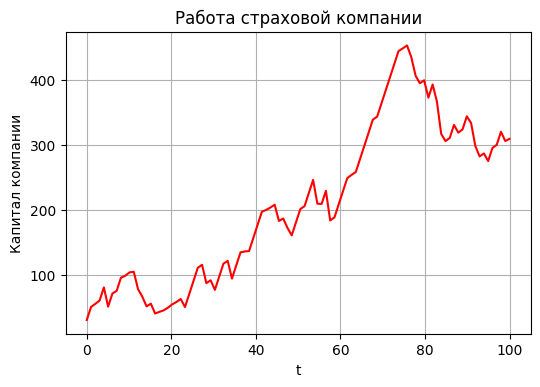

In [468]:
T = 100
lam = 1
x_m = 15
k = 10
W0 = 100
c = 20

t_grid, W = SimulateCapital(T, lam, x_m, k, w, c)

fig, ax = plt.subplots()
fig.dpi = 100

ax.plot(t_grid, W, 'r')
ax.grid()
ax.set_title('–†–∞–±–æ—Ç–∞ —Å—Ç—Ä–∞—Ö–æ–≤–æ–π –∫–æ–º–ø–∞–Ω–∏–∏')
ax.set_xlabel('t')
ax.set_ylabel('–ö–∞–ø–∏—Ç–∞–ª –∫–æ–º–ø–∞–Ω–∏–∏')
plt.show()